In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# 데이터 로드
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/kc_house_data.csv"
df = pd.read_csv(url)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [30]:
#결측치 확인
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [3]:
# price 예측에 필요 없는 컬럼 제거
df.drop(columns=['id', 'zipcode'], inplace=True) # 우편번호가 없어도 위도 경도로 위치를 알 수 있다.

# ✅ 2. date 컬럼 인코딩 방법
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['year'] = df['date'].dt.year   # 연도 추출
df['month'] = df['date'].dt.month # 월 추출
df.drop(columns=['date'], inplace=True)  # 원본 date 컬럼 삭제

df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1


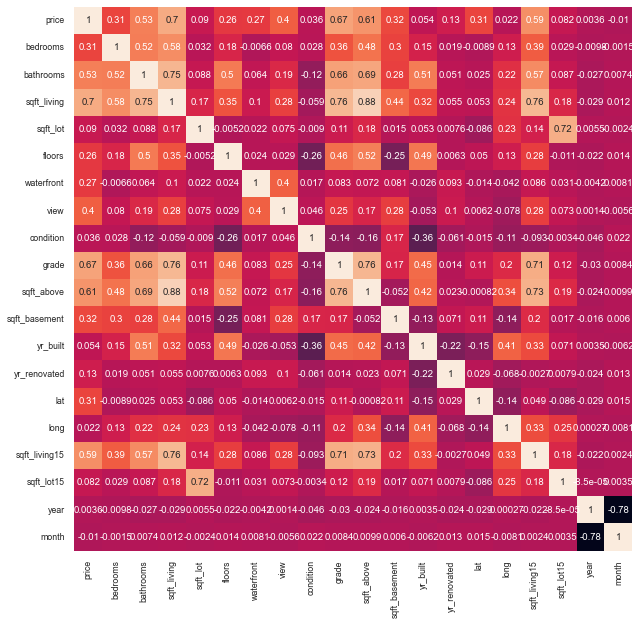

In [4]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# price와 높은 건  sqft_living

In [5]:
# 상관관계가 price와 0.1이하인 컬럼들도 추가 삭제.
df.drop(columns=['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'long', 'sqft_lot15', 'year', 'month'], inplace=True)
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


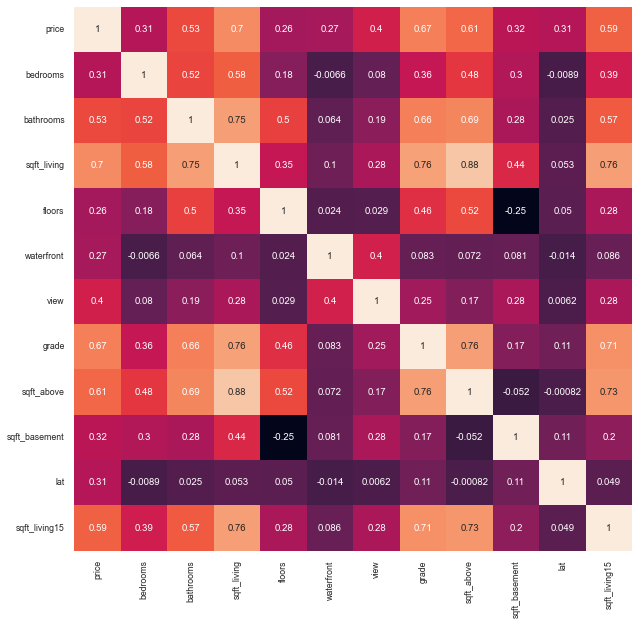

In [6]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# price와 높은 건  sqft_living

In [7]:
X = df.drop(columns=['price']).values  # 독립변수
y = df['price'].values  # 종속변수 (타겟)

X

array([[3.00000e+00, 1.00000e+00, 1.18000e+03, ..., 0.00000e+00,
        4.75112e+01, 1.34000e+03],
       [3.00000e+00, 2.25000e+00, 2.57000e+03, ..., 4.00000e+02,
        4.77210e+01, 1.69000e+03],
       [2.00000e+00, 1.00000e+00, 7.70000e+02, ..., 0.00000e+00,
        4.77379e+01, 2.72000e+03],
       ...,
       [2.00000e+00, 7.50000e-01, 1.02000e+03, ..., 0.00000e+00,
        4.75944e+01, 1.02000e+03],
       [3.00000e+00, 2.50000e+00, 1.60000e+03, ..., 0.00000e+00,
        4.75345e+01, 1.41000e+03],
       [2.00000e+00, 7.50000e-01, 1.02000e+03, ..., 0.00000e+00,
        4.75941e+01, 1.02000e+03]])

In [8]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [9]:
# Standardize the data
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)

# y에 대해서는 y_max, y_min 등을 이용해 Min-Max 방식으로 정규화하거나, 
# 기존대로 표준화하여 사용해도 됩니다.
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y.reshape(-1, 1))  # 2D로 변환 후 정규화
y = y.reshape(-1,)  # 다시 1D로 변환

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 11) (17290,)
(4323, 11) (4323,)


In [10]:
# 딥러닝 모델 구성
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')   # ✅ 출력층: 1개 뉴런, 'linear' 활성화 함수
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# 모델 학습
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split = 0.1)

model.summary()

Epoch 1/30


d:\python\envs\torch_ev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


487/487 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4485 - mse: 0.4485 - val_loss: 0.2241 - val_mse: 0.2241
Epoch 2/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3051 - mse: 0.3051 - val_loss: 0.2055 - val_mse: 0.2055
Epoch 3/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2761 - mse: 0.2761 - val_loss: 0.1860 - val_mse: 0.1860
Epoch 4/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2628 - mse: 0.2628 - val_loss: 0.1922 - val_mse: 0.1922
Epoch 5/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2276 - mse: 0.2276 - val_loss: 0.1833 - val_mse: 0.1833
Epoch 6/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2233 - mse: 0.2233 - val_loss: 0.1725 - val_mse: 0.1725
Epoch 7/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2161 - mse: 0.2161 - val_loss: 0.1857 - val_mse: 0.1857
Epoch 8/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2118 - mse: 0.2118 - val_loss: 0.1713 - val_mse: 0.1713
Epoch 9/30
487/487 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1969 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,253 (145.52 KB)

 Trainable params: 12,417 (48.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,836 (97.02 KB)

In [11]:

# 모델 예측
y_pred = model.predict(X_test)

# 실제 값과 예측 값 비교 (정규화된 경우 원래 스케일로 변환 필요)
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1))  # 원래 값으로 복원
y_pred_original = y_scaler.inverse_transform(y_pred.reshape(-1, 1)) # 원래 값으로 복원


136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step


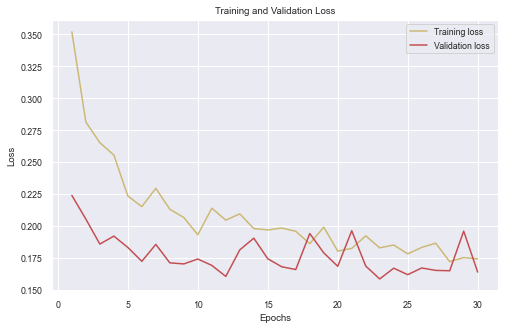

In [12]:
### 1️⃣ 손실(Loss) 시각화 (학습 과정 확인)
plt.figure(figsize=(8, 5))
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

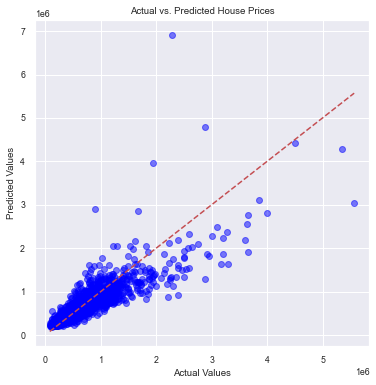

In [13]:
### 2️⃣ 예측값 vs. 실제값 비교 (산점도)
plt.figure(figsize=(6, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5, color='blue')
plt.plot([min(y_test_original), max(y_test_original)], 
         [min(y_test_original), max(y_test_original)], '--r')  # 완벽한 예측선
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted House Prices")
plt.show()

In [14]:

### 5️⃣ 성능 지표 출력
mse = mean_squared_error(y_test_original, y_pred_original)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")  # 1에 가까울수록 좋음

MSE: 37681100978.81
MAE: 101065.01
R² Score: 0.75
